# Exploratory Data Analysis on US Accidents Dataset

This project analyses accident data collected from 49 states of the United States of America over the period between February 2016 and December 2021. The set is sourced from Kaggle. It has a total of 28,45,342 rows and 47 columns.

While it is not possible to predict accidents, it is quite useful to analyze the conditions under which they happen. It will be helpful to have an overview of the conditions that are controllable so that the number of mishaps can be reduced.

## Downloading the Dataset

In [42]:
import opendatasets as od

download_url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


In [43]:
data_filename='./us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and cleaning

In [44]:
import pandas as pd

In [45]:
df=pd.read_csv(data_filename)

In [7]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [69]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df= df.select_dtypes(include=numerics)

len(numeric_df.columns)

14

The data has 14 numeric columns while the rest are categorical variables.

### Percentage of missing values per column

In [11]:
missing_percentages=df.isna().sum().sort_values(ascending=False) / len(df)

In [12]:
missing_percentages[missing_percentages != 0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

The columns ‘Number’, ‘Precipitation(in)’ and ‘Wind_Chill(F)’ have the most missing values. It is wise to exclude them from the ensuing analysis.

### Plot of a horizontal bar chart for missing values

<AxesSubplot:>

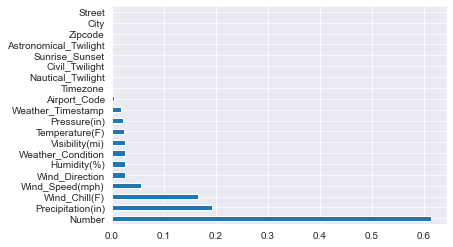

In [46]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [15]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## DATA ANALYSIS AND VISUALIZATION

### State

In [22]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
2845337    CA
2845338    CA
2845339    CA
2845340    CA
2845341    CA
Name: State, Length: 2845342, dtype: object

#### Top ten states by the number of accidents

In [25]:
states_by_accident = df.State.value_counts()
states_by_accident[:10]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

Clearly, a significant number of accidents have happened in California and Florida

#### Plot of top ten states with highest number of accidents

<AxesSubplot:>

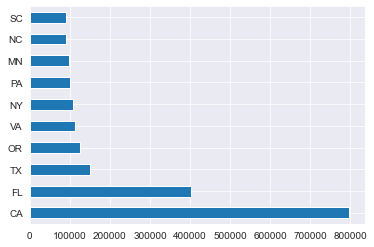

In [47]:
states_by_accident[:10].plot(kind = 'barh')

### Cities

Finding how many cities we have data off

In [48]:
cities=df.City.unique()

In [49]:
len(cities)

11682

So we have record of 11682 cities in the dataset

#### Let's see the top 20 cities with highest number of accidents

In [28]:
cities_by_accident=df.City.value_counts()
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

The top cities include Miami,Los Angeles,Orlando,Dallas,Houston etc. Let’s visualize the top 30 cities and see how many belong to the top ten states.

<AxesSubplot:>

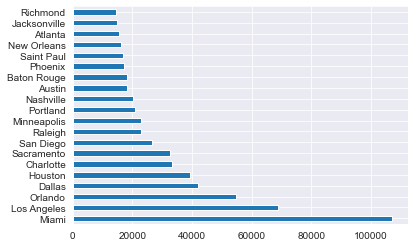

In [31]:
cities_by_accident[:20].plot(kind='barh')

In [30]:
import seaborn as sns
sns.set_style("darkgrid")

#### Let's see the distribution of cities by the number of accidents look like

<AxesSubplot:xlabel='City', ylabel='Count'>

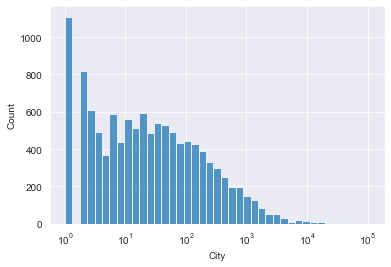

In [50]:
sns.histplot(cities_by_accident,log_scale=True)

In [33]:
cities_by_accident[cities_by_accident==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

Around 1110 cities have reported only one accident during the entire period. This could either be very good news or it could be a result of missing data.

In [34]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]

#### What is the percentage of high accident cities

In [37]:
len(high_accident_cities)/len(cities)

0.04245848313644924

4.24% of the total number of cities have an accident number greater than 1000.

#### The distribution of high accident cities look as-

<AxesSubplot:xlabel='City', ylabel='Count'>

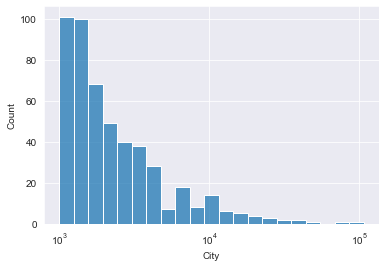

In [40]:
sns.histplot(high_accident_cities,log_scale = True)

#### The distribution of low accident cities look as-

<AxesSubplot:xlabel='City', ylabel='Count'>

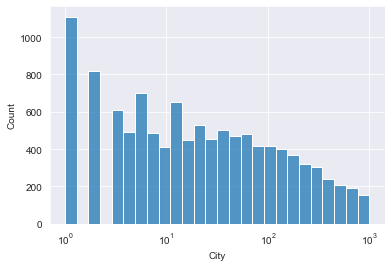

In [41]:
sns.histplot(low_accident_cities,log_scale=True)

The majority of them have witnessed between 10–100 accidents during the period.

### Start time

This column records the start time of the accident in the local time zone.

In [51]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

#### Convert the string to Timestamp format and override the original column

In [52]:
df.Start_Time=pd.to_datetime(df.Start_Time)

In [53]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

#### We want to know what time of the day witnesses more accidents

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

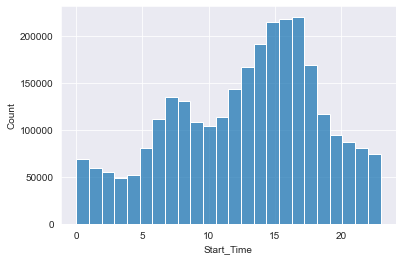

In [84]:
sns.histplot(df.Start_Time.dt.hour, bins=24,kde=False)

There are two peaks of time- one in the morning in between 6 am to 9 am and another between 3 pm and 6 pm. This is consistent with the assumption that rush hours in the morning and evening could lead to more accidents.

#### Let's check this trend for weekends too. We will do a sunday to monday 

C:\Users\joyde\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

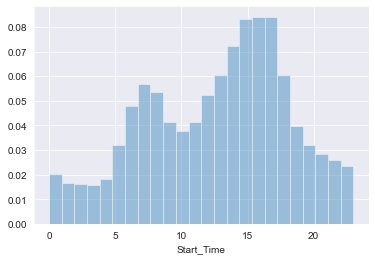

In [85]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

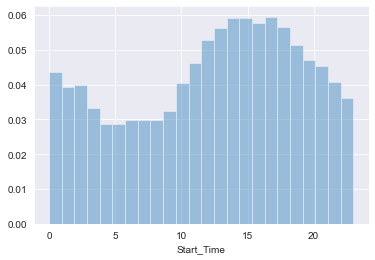

In [56]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)

While Monday follows the general 24-hour pattern- two peaks coinciding with work rush; the distribution for Sunday sees a peak between 11 am and 6 pm. This could be due to people going out for leisurely activities on Sundays.

Let's plot the number of accidents for everyday of the week

<AxesSubplot:xlabel='Start_Time'>

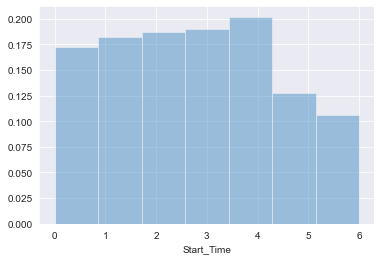

In [57]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7,kde=False,norm_hist=True)

On weekends number of accidents is lower

##### plot for the monthly distribution of accidents

<AxesSubplot:xlabel='Start_Time'>

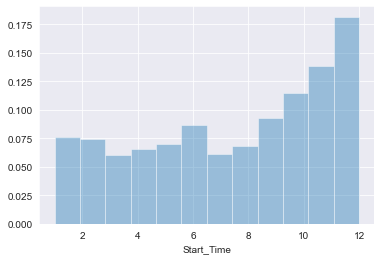

In [95]:
sns.distplot(df.Start_Time.dt.month, bins=12,kde=False,norm_hist=True)

There seems to be a steady upward curve from the second half of the year

Lets check if this pattern holds for every year

<AxesSubplot:xlabel='Start_Time'>

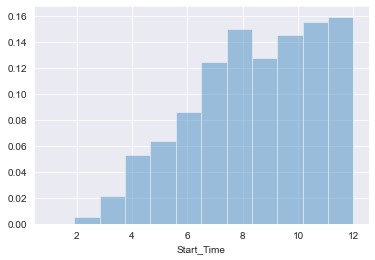

In [58]:
df_2016=df[df.Start_Time.dt.year==2016]
sns.distplot(df_2016.Start_Time.dt.month, bins=12,kde=False,norm_hist=True)

Clearly the data is missing for January 2016 as the data collection starts from february 2016 and initially there may be some missing datas as the data collection newly started

<AxesSubplot:xlabel='Start_Time'>

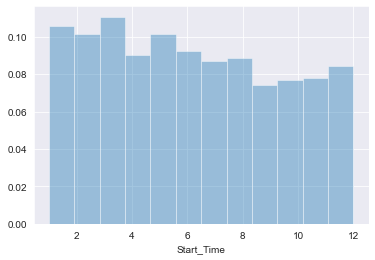

In [97]:
df_2017=df[df.Start_Time.dt.year==2017]
sns.distplot(df_2017.Start_Time.dt.month, bins=12,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

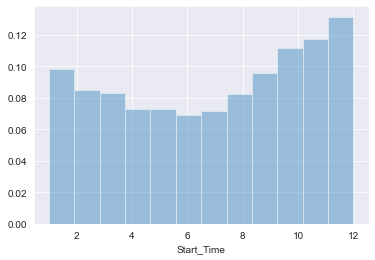

In [98]:
df_2018=df[df.Start_Time.dt.year==2018]
sns.distplot(df_2018.Start_Time.dt.month, bins=12,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

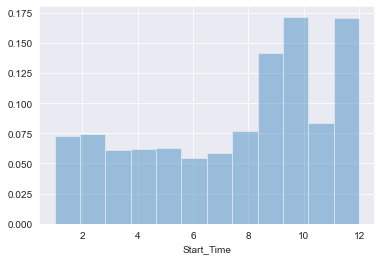

In [99]:
df_2019=df[df.Start_Time.dt.year==2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

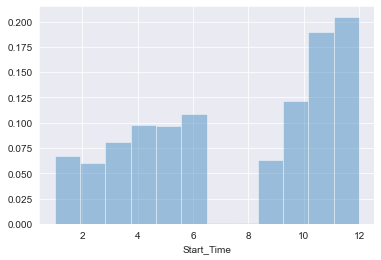

In [100]:
df_2020=df[df.Start_Time.dt.year==2020]
sns.distplot(df_2020.Start_Time.dt.month, bins=12,kde=False,norm_hist=True)

There are missing values for some months in 2020 which shows the effect of COVID-19 on traffic behaviour and accidents

<AxesSubplot:xlabel='Start_Time'>

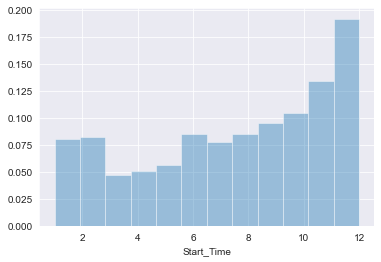

In [101]:
df_2021=df[df.Start_Time.dt.year==2021]
sns.distplot(df_2021.Start_Time.dt.month, bins=12,kde=False,norm_hist=True)

### Start Lat and Start Lng

In [59]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [60]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

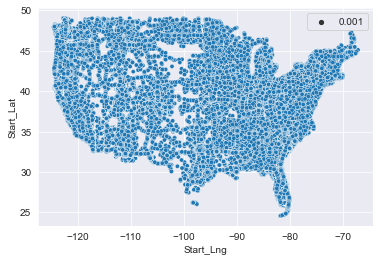

In [61]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.001)

There are more accidents in coastal areas as coastal areas are generally highly populated

### Temperature

This column recorded temperature at the time of the accident in degrees Fahrenheit.

In [69]:
df['Temperature(F)'].value_counts()

 73.0     64505
 77.0     63575
 75.0     60534
 72.0     59681
 68.0     58557
          ...  
 109.8        1
-9.8          1
 170.6        1
 107.2        1
 99.1         1
Name: Temperature(F), Length: 788, dtype: int64

#### visualisation of the Temperature in a boxplot

<AxesSubplot:xlabel='Temperature(F)'>

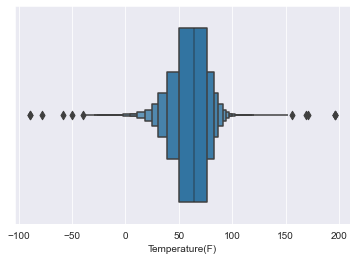

In [74]:
sns.boxenplot(x=df['Temperature(F)'])

So, a chunk of the accidents happens to be in areas experiencing temperatures in the range of (50–60) degrees Fahrenheit. Most accidents occur in colder weather or regions.

### Weather Condition

In [75]:
weather = df.Weather_Condition.value_counts().reset_index()
weather.columns = ['Weather_Condition','Accidents']
weather['Percentage'] = round(weather['Accidents'] * 100 /weather['Accidents'].sum() , 2)
weather.head(10)

,Weather_Condition,Accidents,Percentage
0,Fair,1107194,39.90
1,Mostly Cloudy,363959,13.12
2,Cloudy,348767,12.57
3,Partly Cloudy,249939,9.01
4,Clear,173823,6.26
5,Light Rain,128403,4.63
6,Overcast,84882,3.06
7,Scattered Clouds,45132,1.63
8,Light Snow,43752,1.58
9,Fog,41226,1.49


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Plot of percentage of accidents on the basis of weather condition

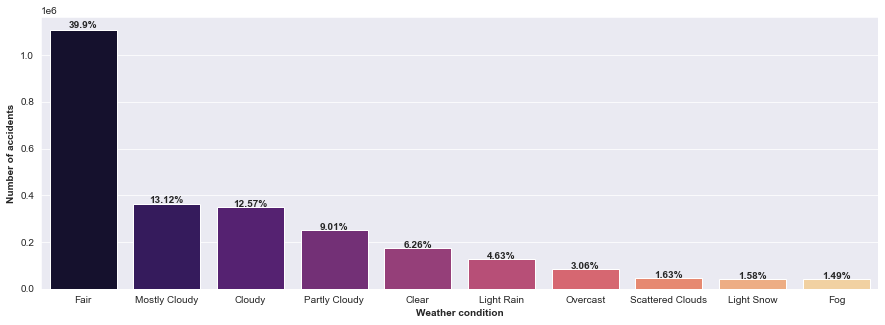

In [78]:
fig, ax = plt.subplots(figsize = (15,5))
sns.barplot(x='Weather_Condition',y='Accidents',data=weather.head(10),palette="magma")
plt.xlabel("Weather condition",ha='center',weight='bold')
plt.ylabel("Number of accidents",ha='center',weight='bold')


i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(weather.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

Cloudy weather contributed to some accidents but most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.

### Traffic Signal

A binary column indicating the presence of a traffic signal nearby the spot of the accident.

<AxesSubplot:ylabel='Traffic_Signal'>

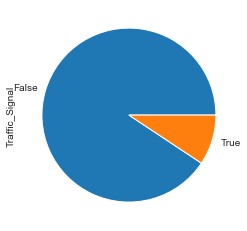

In [79]:
df['Traffic_Signal'].value_counts().plot(kind='pie')

poor traffic management is a cause for the chunk of the accidents.

### Crossing

The column records the presence of a crossing nearby at the point of the accident. “True” and “False” values is best visualized in a pie-chart

<AxesSubplot:ylabel='Crossing'>

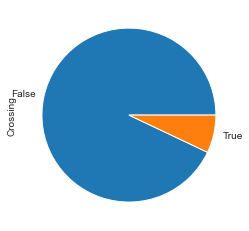

In [82]:
df['Crossing'].value_counts().plot(kind= 'pie')

The accidents mostly happened away from a crossing

### Severity

In [80]:
Acc_Severity = df.Severity.value_counts().reset_index()
Acc_Severity.columns = ['Severity','Accidents']
Acc_Severity['Percentage'] = round(Acc_Severity['Accidents'] * 100 /Acc_Severity['Accidents'].sum() , 2)
Acc_Severity.head()

,Severity,Accidents,Percentage
0,2,2532991,89.02
1,3,155105,5.45
2,4,131193,4.61
3,1,26053,0.92


#### Plot of percentage of accidents based on severity 

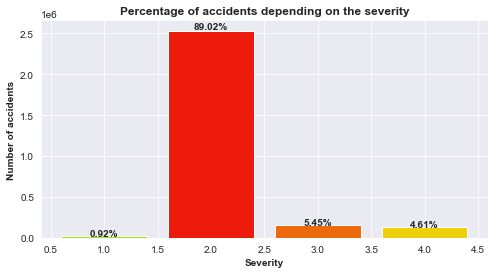

In [81]:
plt.figure(figsize=(8,4))
graph = plt.bar(Acc_Severity.Severity,Acc_Severity.Accidents,
               color=('#ed1b0c','#ed6a0c','#edcf0c','#93ed0c'))
plt.title('Percentage of accidents depending on the severity',ha='center',weight='bold')
plt.xlabel("Severity",ha='center',weight='bold')
plt.ylabel("Number of accidents",ha='center',weight='bold')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Acc_Severity.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

## INSIGHTS AND CONCLUSION